Sample Code 1

In [9]:
# self.sigma: Standard deviation of Gaussian distribution
# self.lr: Learning rate
# self.n_nodes1: Number of nodes in the first layer
# self.n_nodes2: Number of nodes in the second layer
# self.n_output: Number of nodes in the output layer

# optimizer = SGD(self.lr)
# self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
# self.activation1 = Tanh()
# self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
# self.activation2 = Tanh()
# self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
# self.activation3 = Softmax()

## Classifying fully connected layers

In [72]:
class FC:
    """
    Number of nodes Fully connected layer from n_nodes1 to n_nodes2
    Parameters
    ----------
    n_nodes1 : int
      Number of nodes in the previous layer
    n_nodes2 : int
      Number of nodes in the later layer
    initializer: instance of initialization method
    optimizer: instance of optimization method
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # Initialize
        # Initialize self.W and self.B using the initializer method
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.W = initializer.W(n_nodes1,n_nodes2)
        self.B = initializer.B(n_nodes2)
        self.Hw = 0
        self.Hb = 0
    def forward(self, X):
        """
        forward
        Parameters
        ----------
        X : The following forms of ndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : The following forms of ndarray, shape (batch_size, n_nodes2)
            output
        """        
       
        A =  X @self.W + self.B
        self.Z = X
        return A
    def backward(self, dA):
        """
        Backward
        Parameters
        ----------
        dA : The following forms of ndarray, shape (batch_size, n_nodes2)
            Gradient flowing from behind
        Returns
        ----------
        dZ : The following forms of ndarray, shape (batch_size, n_nodes1)
            Gradient to flow forward
        """
        self.dB = np.sum(dA,axis = 0)
        self.dW = self.Z.T@dA
        self.dZ = dA @ self.W.T
        
        # update
        self = self.optimizer.update(self)
        return self.dZ

## Classifying the initialization method

In [8]:
class SimpleInitializer:
    """
    Simple initialization with Gaussian distribution
    Parameters
    ----------
    sigma : float
      Standard deviation of Gaussian distribution
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        Weight initialization
        Parameters
        ----------
        n_nodes1 : int
          Number of nodes in the previous layer
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        W :
        """
        W = self.sigma *np.random.randn(n_nodes1,n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        Bias initialization
        Parameters
        ----------
        n_nodes2 : int
          Number of nodes in the later layer

        Returns
        ----------
        B :
        """
        B = self.sigma *np.random.randn(n_nodes2)
        return B

## Classifying optimization methods

In [68]:
class SGD:
    """
    Stochastic gradient descent
    Parameters
    ----------
    lr : Learning rate
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        Update weights and biases for a layer
        Parameters
        ----------
        layer : Instance of the layer before update
        """
        layer.W = layer.W - self.lr*layer.dW
        layer.B = layer.B - self.lr*layer.dB
        return layer

## Classifying activation functions

In [56]:
class Softmax:
    def forward(self, A): 
        Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return Z
        
    def backward(self, Z, y):
        dA = Z - y

        return dA
    def loss(self,Z,y):
        L = - np.sum(y * np.log(Z)) / len(y)
        return L

## ReLU class creation

In [49]:
class ReLU:
    def forward(self, A): 
        self.A = A
        A[A <= 0] = 0
        return A
    
    def backward(self, dZ):
        dA = dZ*np.array(self.A > 0, np.int)
        return dA
    
class Sigmoid:

    def forward(self, A):
        self.A = A
        Z = 1 / (1 + np.exp(-self.A))
        return Z
    
    def backward(self, dZ):
        dA = dZ * ((1 / (1 + np.exp(-self.A))) - (1 / (1 + np.exp(-self.A)))**2)
        return dA
    
class Tanh:

    def forward(self, A):
        self.A = A
        Z = np.tanh(self.A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - np.tanh(self.A)**2)
        return dA
    
        
        

In [13]:
class XavierInitializer:
    def __init__(self,sigma):
        self.sigma =sigma
        
    def W(self, n_nodes1, n_nodes2):
      
        self.sigma = 1/np.sqrt(n_nodes1)
        W = self.sigma *np.random.randn(n_nodes1,n_nodes2)
        return W
    
    def B(self,n_nodes2):
        B = self.sigma *np.random.randn(n_nodes2)
        return B
       
        
        

In [14]:
class HeInitializer:
    def __init__(self,sigma):
        self.sigma =sigma
    def W(self, n_nodes1, n_nodes2):
      
        self.sigma = np.sqrt(2/n_nodes1)
        W = self.sigma *np.random.randn(n_nodes1,n_nodes2)
        return W
    
    def B(self,n_nodes2):
        B = self.sigma *np.random.randn(n_nodes2)
        return B

## Optimization method

In [109]:
class AdaGrad:
    def __init__(self,lr):
        self.lr = lr
        
    def update(self,layer):
        layer.Hw += layer.dW * layer.dW
        layer.Hb += layer.dB * layer.dB
        alpha = 1e-7
        layer.W = layer.W - self.lr*(1/np.sqrt(layer.Hw+alpha))*layer.dW
        layer.B = layer.B - self.lr*(1/np.sqrt(layer.Hb+alpha))*layer.dB
        return layer

## Class completion

In [83]:
class ScratchDeepNeuralNetworkClassifier():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, n_nodes1 ,n_nodes2, n_output ,batch_size ,epochs,sigma=0.02,optimizer=SGD,activation_function = "sigmoid",lr = 0.01,bias = False,verbose = True):
        self.verbose = verbose
        self.n_nodes1= n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output 
        self.batch_size = batch_size
        self.lr = lr
        self.sigma = sigma

        self.check_bias = bias
        self.activation_function = activation_function
        self.epochs = epochs
        self.optimizer = optimizer(self.lr)
    def fit(self, X, y, X_val=None, y_val=None):
        self.initializer = self.get_initializer()
        
        self.FC1 = FC(X.shape[1],self.n_nodes1,self.initializer,self.optimizer)
        self.FC2 = FC(self.n_nodes1,self.n_nodes2,self.initializer,self.optimizer)
        self.FC3 = FC(self.n_nodes2, self.n_output,self.initializer,self.optimizer)
        
        self.activation1 = self.get_activation()
        self.activation2 = self.get_activation()
        self.activation3 = Softmax()
            
        get_mini_batch = GetMiniBatch(X,y,self.batch_size)
        self.loss_train = []
        self.loss_val = []
        for epoch in range(self.epochs):  
            for mini_X_train, mini_y_train in get_mini_batch:

                self.forward(mini_X_train)
#                
                self.backward(mini_X_train,mini_y_train)
#             break
            self.forward(X)
            self.loss_train.append(self.activation3.loss(self.result,y))
            if X_val is not None:
                self.forward(X_val)
                self.loss_val.append(self.activation3.loss(self.result,y_val))
            

    
        
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        
        if self.verbose:
             #verbose is set to True, the learning process etc. is output.
            print(self.loss_train)
    def get_initializer(self):
        if self.activation_function == "sigmoid" or self.activation_function == "tanh":
            return XavierInitializer(self.sigma)
        elif self.activation_function == "relu":
            return HeInitializer(self.sigma)
    
    def get_activation(self):
        if self.activation_function == "sigmoid" :
            return Sigmoid()
        elif self.activation_function == "tanh":
            return Tanh()
        elif self.activation_function == "relu":
            return ReLU()

        
    
        
       
    def forward(self,X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)

        A2 = self.FC2.forward(Z1)

        Z2 = self.activation2.forward(A2)

        A3 = self.FC3.forward(Z2)

        Z3 = self.activation3.forward(A3)
        self.result = Z3

        

    def backward(self,X,y):
 
        dA3 = self.activation3.backward(self.result,y)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)
       
        

    def derivative(self,A,d):
        if self.activation_function == "sigmoid":
            dA = d*(1 / (1 + np.exp(-A)))*(1-(1 / (1 + np.exp(-A))))
            return dA
        elif self.activation_function == " tanh":
            dA = d*(1- np.tanh(A)**2)
            return dA
        

        

        
    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        self.forward(X)
        return np.argmax(self.result,axis = 1)
        
      
    
class GetMiniBatch:
    """
Iterator to get a mini-batch
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

## Learning and estimation

In [20]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [22]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [24]:
from sklearn.model_selection import train_test_split
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

In [84]:
model = ScratchDeepNeuralNetworkClassifier(400 ,200, 10 ,20 ,10,activation_function = "sigmoid",lr = 0.01,bias = False,verbose = True)

In [85]:
model.fit(X_train_new,y_train_new,X_val,y_val)

[0.30762750298731273, 0.23807805403178153, 0.188542565943999, 0.15113424924742025, 0.12531006019572125, 0.10617291611866063, 0.09105703933648615, 0.07875791638780166, 0.06861854445259641, 0.060186141281533725]


In [86]:
from sklearn.metrics import accuracy_score
predict = model.predict(X_test)
accuracy_score(predict,y_test)

0.9702

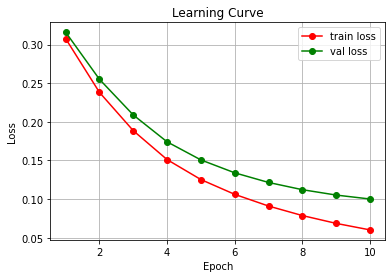

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, model.epochs + 1), model.loss_train, color="r", marker="o", label="train loss")

plt.plot(range(1, model.epochs + 1), model.loss_val, color="g", marker="o", label="val loss")

plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend(loc="best")
plt.show()

In [89]:
model = ScratchDeepNeuralNetworkClassifier(400 ,200, 10 ,20 ,10,activation_function = "relu",lr = 0.01,bias = False,verbose = True)

In [90]:
model.fit(X_train_new,y_train_new,X_val,y_val)

[0.08850783592706093, 0.05330277051151308, 0.035698262117637186, 0.023742056125033134, 0.031220523173337237, 0.01891710311052597, 0.02012520707496376, 0.014463888582985729, 0.016199991924039953, 0.009955463015854477]


In [91]:
predict = model.predict(X_test)
accuracy_score(predict,y_test)

0.9801

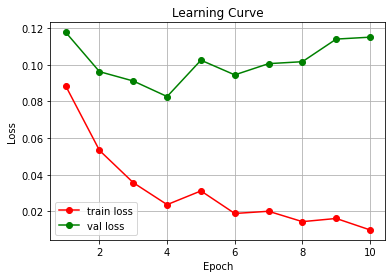

In [92]:
plt.plot(range(1, model.epochs + 1), model.loss_train, color="r", marker="o", label="train loss")

plt.plot(range(1, model.epochs + 1), model.loss_val, color="g", marker="o", label="val loss")

plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend(loc="best")
plt.show()

In [110]:
class ScratchDeepNeuralNetworkClassifier4layers():
    """
    Simple three-layer neural network classifier
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, n_nodes1 ,n_nodes2,n_nodes3, n_output ,batch_size ,epochs,sigma=0.02,optimizer=SGD,activation_function = "sigmoid",lr = 0.01,bias = False,verbose = True):
        self.verbose = verbose
        self.n_nodes1= n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_nodes3 = n_nodes3
        self.n_output = n_output 
        self.batch_size = batch_size
        self.lr = lr
        self.sigma = sigma

        self.check_bias = bias
        self.activation_function = activation_function
        self.epochs = epochs
        self.optimizer = optimizer(self.lr)
    def fit(self, X, y, X_val=None, y_val=None):
        self.initializer = self.get_initializer()
        
        self.FC1 = FC(X.shape[1],self.n_nodes1,self.initializer,self.optimizer)
        self.FC2 = FC(self.n_nodes1,self.n_nodes2,self.initializer,self.optimizer)
        self.FC3 = FC(self.n_nodes2, self.n_nodes3,self.initializer,self.optimizer)
        self.FC4 = FC(self.n_nodes3, self.n_output,self.initializer,self.optimizer)
        
        self.activation1 = self.get_activation()
        self.activation2 = self.get_activation()
        self.activation3 = self.get_activation()
        self.activation4 = Softmax()
            
        get_mini_batch = GetMiniBatch(X,y,self.batch_size)
        self.loss_train = []
        self.loss_val = []
        for epoch in range(self.epochs):  
            for mini_X_train, mini_y_train in get_mini_batch:

                self.forward(mini_X_train)
#                
                self.backward(mini_X_train,mini_y_train)
#             break
            self.forward(X)
            self.loss_train.append(self.activation4.loss(self.result,y))
            if X_val is not None:
                self.forward(X_val)
                self.loss_val.append(self.activation4.loss(self.result,y_val))
            

    
        
        """
        Learn a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        
        if self.verbose:
             #verbose is set to True, the learning process etc. is output.
            print(self.loss_train)
    def get_initializer(self):
        if self.activation_function == "sigmoid" or self.activation_function == "tanh":
            return XavierInitializer(self.sigma)
        elif self.activation_function == "relu":
            return HeInitializer(self.sigma)
    
    def get_activation(self):
        if self.activation_function == "sigmoid" :
            return Sigmoid()
        elif self.activation_function == "tanh":
            return Tanh()
        elif self.activation_function == "relu":
            return ReLU()

        
    
        
       
    def forward(self,X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)

        A2 = self.FC2.forward(Z1)

        Z2 = self.activation2.forward(A2)

        A3 = self.FC3.forward(Z2)

        Z3 = self.activation3.forward(A3)
        
        A4 = self.FC4.forward(Z3)
        
        Z4 = self.activation4.forward(A4)
        self.result = Z4

        

    def backward(self,X,y):
        dA4 = self.activation4.backward(self.result,y)
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1)
       
        

    def derivative(self,A,d):
        if self.activation_function == "sigmoid":
            dA = d*(1 / (1 + np.exp(-A)))*(1-(1 / (1 + np.exp(-A))))
            return dA
        elif self.activation_function == " tanh":
            dA = d*(1- np.tanh(A)**2)
            return dA
        

        

        
    def predict(self, X):
        """
        Estimate using a neural network classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        self.forward(X)
        return np.argmax(self.result,axis = 1)
        
      

In [111]:
model = ScratchDeepNeuralNetworkClassifier4layers(400 ,200,100, 10 ,20 ,10,optimizer = AdaGrad,activation_function = "relu",lr = 0.01,bias = False,verbose = True)

In [112]:
model.fit(X_train_new,y_train_new,X_val,y_val)

[0.0845541829283157, 0.05264536774076185, 0.0370367705788821, 0.026624461710396875, 0.01970520483578441, 0.014656895438732219, 0.011021413530939689, 0.008483874124114124, 0.0063903165444555805, 0.004782759129474072]


In [113]:
predict = model.predict(X_test)
accuracy_score(predict,y_test)

0.9796

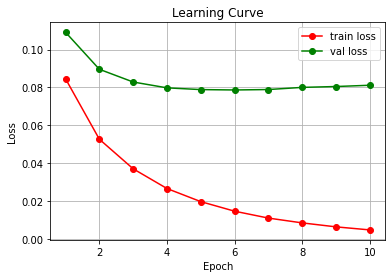

In [114]:
plt.plot(range(1, model.epochs + 1), model.loss_train, color="r", marker="o", label="train loss")

plt.plot(range(1, model.epochs + 1), model.loss_val, color="g", marker="o", label="val loss")

plt.title("Learning Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend(loc="best")
plt.show()